<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group_4(LogisticRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Assignment 2 (5%)
### Total marks: 30

### Group No: 4

###Group Members:
1)Nur Arifah Ummaimah Binti Mohd Rosli

2)Nur Aisyah Maisarah Binti Zaini

3)Shasmita Dev A/P Ramesh

4)Parrvathavarthini A/P Paramasivam

5)Al-Chnani Hayder Adnan Abed

6)Nabihah Binti Zulkarnain

In this assignment, you need to apply logistic regression using Prima Indian Diabetis dataset. Note: You can use any appropriate Python libraries for this assignment, such as pandas, numpy, scikit-learn, matplotlib, and seaborn.

####(Step 1) Load the Pima Indian Diabetes dataset into Python using pandas library [2 marks]

In [ ]:
## (write your codes here)
import pandas as pd

# Load the dataset using pandas
dataset = pd.read_csv('diabetes.csv')
# Display the first few rows of the dataset
print(dataset.head(50))




    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

####(Step 2) Preprocess the data to clean, remove null values, and normalize if needed. [4 marks]

In [ ]:
## Check for missing values
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
## No null values in the dataset

In [ ]:
## Show more informations on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
## Feature scaling to normalize the range of independent variables
from sklearn.preprocessing import StandardScaler
## Splitting the data into independent (X) and dependant (y) variables.

X = dataset.iloc[:,:-1] #Variables

y = dataset.iloc[:, 8] # Outcome

sc = StandardScaler()
X = sc.fit_transform(X)


####(Step 3) Split the dataset into training and testing subsets. Use 1) 50:50; 2)70:30; 3)80:20; and 4)90:10 ratio of training to testing data. [4 marks]

In [ ]:
from sklearn.model_selection import train_test_split

# X is the input features, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)





####(Step 4) Perform logistic regression on the training data and show the training accuracy. [4 marks]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict labels for the training data
y_train_pred = logreg.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Print the training accuracy
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.7756874095513748


####(Step 5) Use the trained model to make predictions on the testing data. [4 marks]

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)



     Actual  Predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          0
..      ...        ...
512       0          0
109       1          0
587       0          0
362       0          0
734       0          0

[77 rows x 2 columns]


In [ ]:
residuals = y_test - y_pred
print("Residuals:")
print(residuals)

Residuals:
668    0
324    0
624    0
690    0
473    0
      ..
512    0
109    1
587    0
362    0
734    0
Name: Outcome, Length: 77, dtype: int64


####(Step 6) Evaluate the model's performance using appropriate metrics such as accuracy, true positive rate and true negative rate. [8 marks]

In [ ]:
from sklearn.metrics import confusion_matrix

# Set a threshold in order to convert continuous values to binary categories if presented in the dataset
threshold = 0.5
y_test_binary = (y_test >= threshold).astype(int)    # Convert y_test and y_pred to binary categories using the threshold
y_pred_binary = (y_pred >= threshold).astype(int)    # Convert y_test and y_pred to binary categories using the threshold

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print(cf_matrix)

Accuracy = (36 + 18)/(36+ 14 + 9 + 18)
Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binary,y_pred_binary)
#70% accuracy of the model


[[36 14]
 [ 9 18]]


0.7012987012987013

####(Step 7) Visualize the model's performance using appropriate charts such as a confusion matrix. [4 marks]

In [ ]:

dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 23.52222222222222, 'Predicted label')

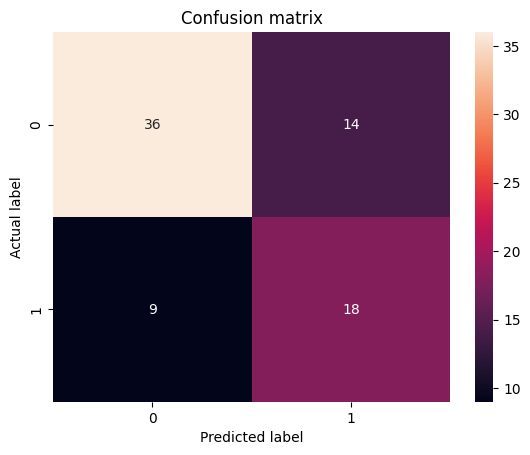

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame(cf_matrix), annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')